In [1]:
import json
import fractions # For making nice ratios
from ipywidgets import interact, interactive, widgets, IntSlider, IntText, ToggleButton, Valid, Text, Checkbox, Box, Layout
from IPython.display import Image

f = open('./abc_recipes.json').read()
data = json.loads(f)

In [2]:
recs = data['recipes']
machs = data['craftingMachines']

In [3]:
from factorio import Recipe, Machine, Cookbook # convenience classes
from factorio import *

In [4]:
# Build master list of recipes and machines
# Barreling and converting recipes aren't relevant

recipes = {}
for reci in recs:
    if not 'barrel' in reci['name']:
        if not 'converter' in reci['name']:
            if not 'repl' in reci['name']:
                rec = Recipe(reci)
                recipes[reci['name']] = rec
    
machines = {}
for mach in machs:
    if mach['name'] != 'player':
        mac = Machine(mach)
        machines[mach['name']] = mac

In [5]:
abc = Cookbook(recipes,machines)

In [6]:
# Remove machines not researched yet
unavailable_machines = ['ore-processing-machine-3','ore-processing-machine-4',
                       'angels-chemical-plant-4','blast-furnace-4',
                       'casting-machine-4','induction-furnace-4',
                       'ore-powderizer-3','pellet-press-3','pellet-press-4',
                       'powder-mixer-3','sintering-oven-4',
                       'strand-casting-machine-3','strand-casting-machine-4',
                       'electronics-machine-3','electronics-machine-2',
                       'assembling-machine-3','assembling-machine-4',
                       'assembling-machine-5','assembling-machine-6',
                       'electric-furnace', 'electric-furnace-2','electric-furnace-3',
                       'electric-chemical-mixing-furnace-2','electric-chemical-mixing-furnace',
                       'steel-furnace','mixing-steel-furnace','chemical-furnace','electric-mixing-furnace']
for m in unavailable_machines:
    if m in abc.machines:
        del abc.machines[m]

In [7]:
abc.search_recipes('brick')

stone-brick
wood-bricks
angels-clay-brick-raw
angels-clay-brick
angels-concrete-brick
angels-reinforced-concrete-brick


In [8]:
abc.recipes['solder']

solder
Ingredients: 
    1 resin
    4 solder-alloy
Products: 
    8 solder
Time: 2



In [9]:
abc.chosen_recipe_items['wooden-board'] = 'wooden-board'
abc.chosen_recipe_items['copper-cable'] = 'copper-cable'
abc.chosen_recipe_items['solder'] = 'solder'
abc.chosen_recipe_items['tinned-copper-cable'] = 'tinned-copper-cable'
abc.chosen_recipe_items['resin'] = 'bob-resin-wood'
abc.chosen_recipe_items['solder-alloy'] = 'solder-alloy-lead'
abc.chosen_recipe_items['solid-lime'] = 'solid-lime'
abc.chosen_recipe_items['solid-limestone'] = 'solid-limestone'
abc.chosen_recipe_items['liquid-concrete'] = 'concrete-mixture-1'
abc.chosen_recipe_items['solid-cement'] = 'cement-mixture-1'

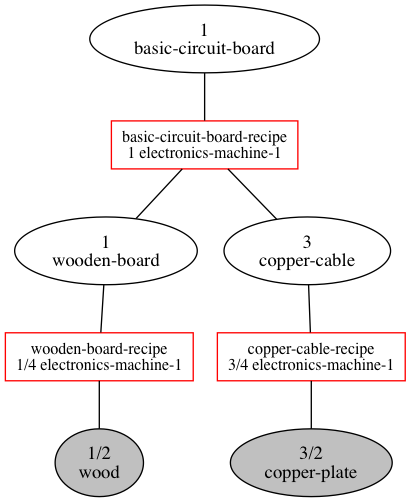

In [10]:
bcb = abc.production_tree('basic-circuit-board',show_options=False)
show_tree(bcb)

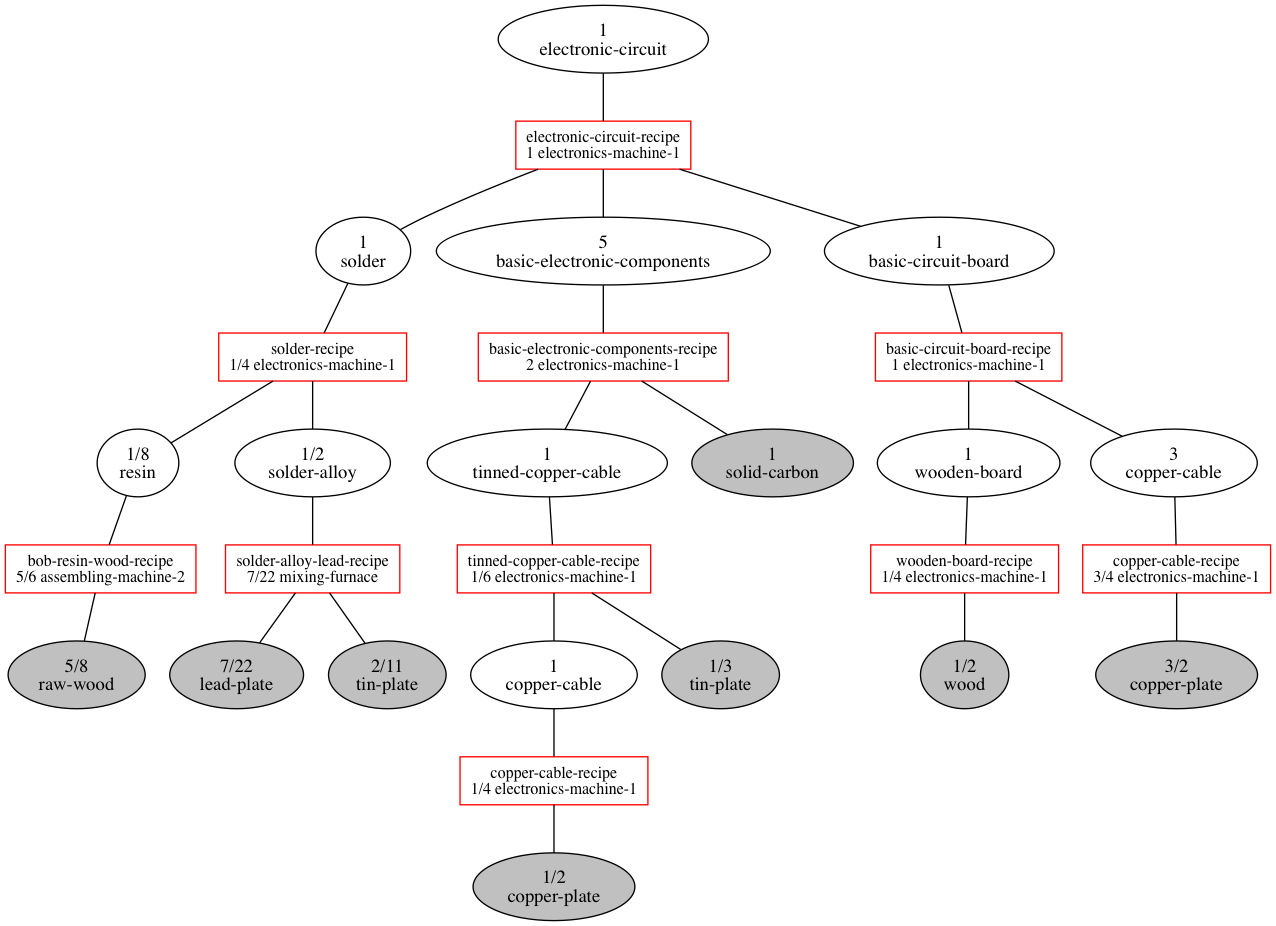

In [11]:
beb = abc.production_tree('electronic-circuit')
show_tree(beb)

In [12]:
from anytree.exporter import DotExporter
DotExporter.to_dotfile(bcb,'test.dot')

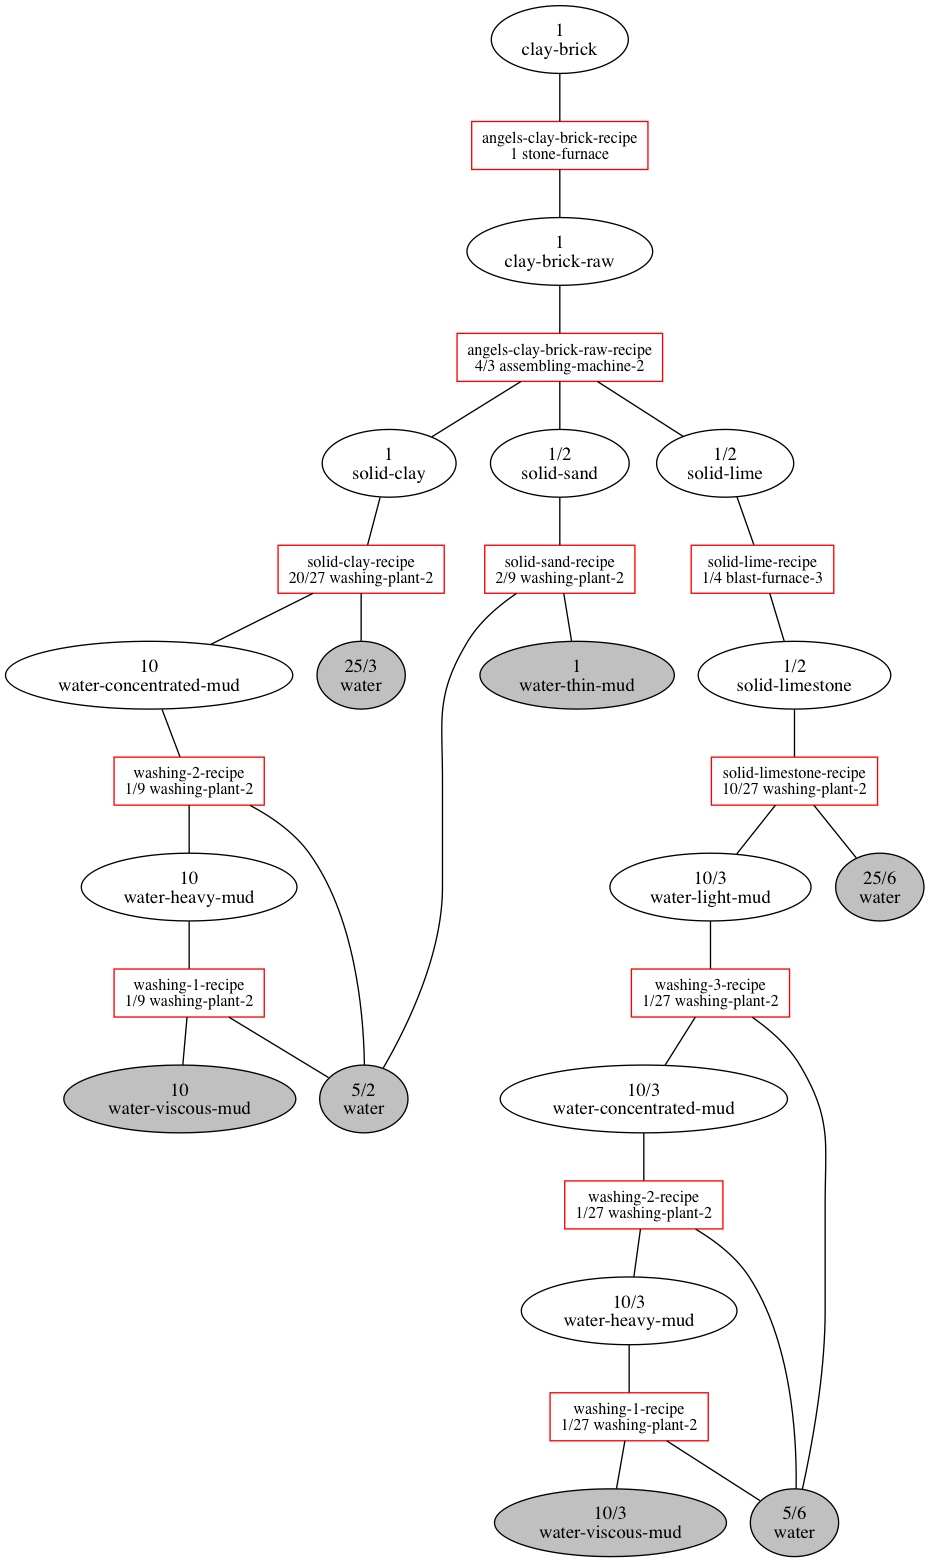

In [13]:
brick = abc.production_tree('clay-brick',commodities=['water-viscous-mud'])
show_tree(brick)

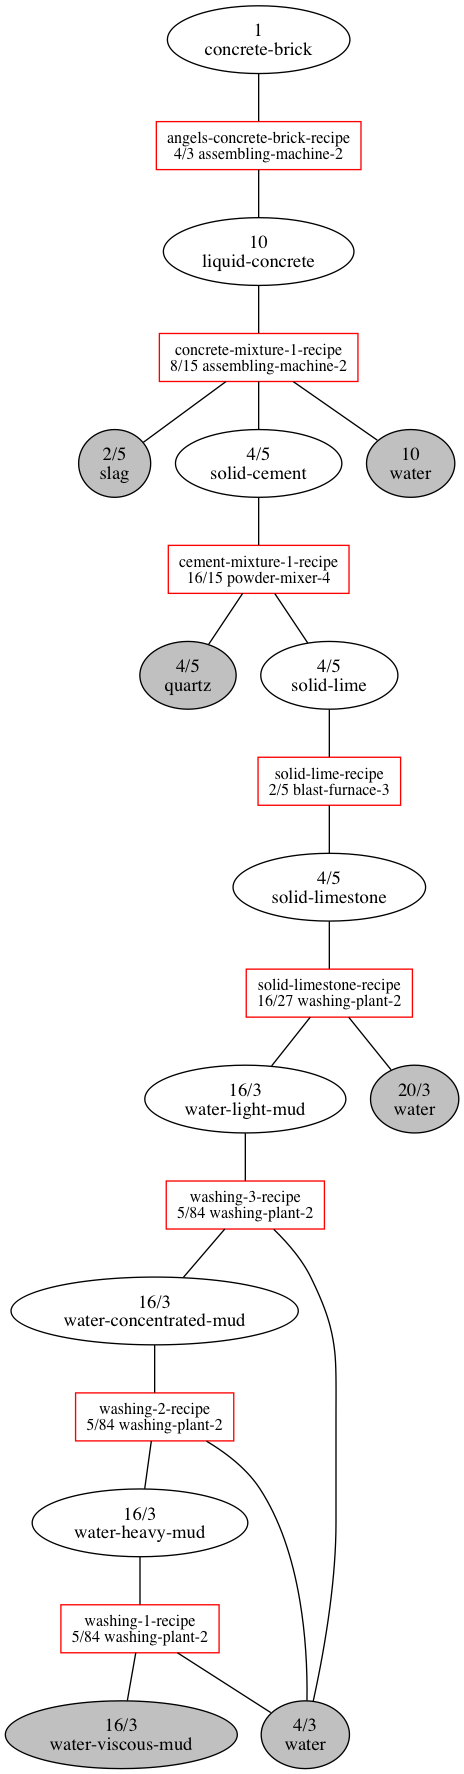

In [14]:
brick = abc.production_tree('concrete-brick',commodities=['water-viscous-mud','slag','quartz'],show_options=True)
show_tree(brick)

In [15]:
all_ingredients(brick)

{'slag': 0.4,
 'water': 20.666666666666664,
 'quartz': 0.8,
 'water-viscous-mud': 5.333333333333333}

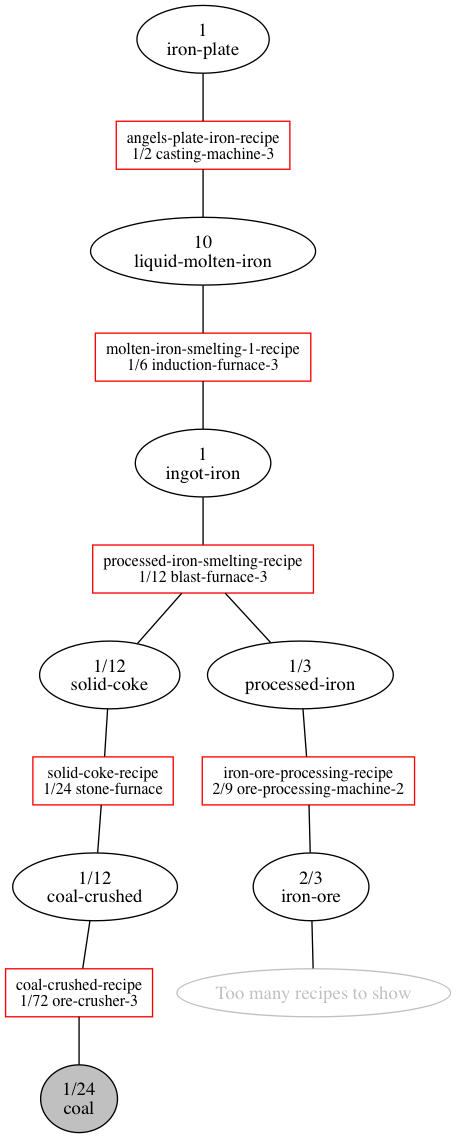

In [16]:
iron = abc.production_tree('iron-plate',show_options=True,#commodities=['iron-ore'],
                           preferred_recipes=['angels-plate-iron','molten-iron-smelting-1',
                                              'solid-coke','processed-iron-smelting'])
show_tree(iron)

In [17]:
abc.find_producers('iron-plate')

['angels-iron-pebbles-smelting',
 'angels-iron-nugget-smelting',
 'angels-roll-iron-converting',
 'angels-plate-iron',
 'angelsore1-crushed-smelting',
 'iron-plate']

In [18]:
abc.recipes['concrete-mixture-1']

concrete-mixture-1
Ingredients: 
    4 slag
    8 solid-cement
    100 water
Products: 
    100 liquid-concrete
Time: 4



In [19]:
abc.recipes['concrete-mixture-2']

concrete-mixture-2
Ingredients: 
    3 stone
    3 solid-sand
    6 solid-cement
    100 water
Products: 
    120 liquid-concrete
Time: 4



In [20]:
abc.recipes['cement-mixture-1']

cement-mixture-1
Ingredients: 
    1 quartz
    1 solid-lime
Products: 
    1 solid-cement
Time: 4



In [21]:
abc.recipes['cement-mixture-2']

cement-mixture-2
Ingredients: 
    1 alumina
    1 iron-ore
    1 quartz
    1 solid-lime
Products: 
    2 solid-cement
Time: 4



In [22]:
abc.find_producers('solid-cement')

['cement-mixture-1', 'cement-mixture-2']

In [23]:
ichains = abc.find_chains('iron-ore','iron-plate')

In [24]:
for chain in ichains:
    print(chain[0::2],abc.calculate_yield(chain))

['iron-ore', 'iron-plate'] 0.75
['iron-ore', 'angels-iron-pebbles', 'iron-plate'] 1.0
['iron-ore', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 1.0
['iron-ore', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 2.0
['iron-ore', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 2.0
['iron-ore', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 3.0
['iron-ore', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 3.0
['iron-ore', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 3.0
['iron-ore', 'processed-iron', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 1.5
['iron-ore', 'processed-iron', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 3.0
['iron-ore', 'processed-iron', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 3.0
['iron-ore', 'processed-iron', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 4.5
['iron-ore', 'processed-iron', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 4.5
['iron-ore', 'processed-iron', 'ingot-iron', 'liquid-molten-iron', 'iron-plate'] 4.5
['

In [25]:
abc.find_producers('iron-ore')

['clowns-ore1-chunk-processing',
 'clowns-ore1-crushed-processing',
 'clowns-ore1-crystal-processing',
 'clowns-ore1-pure-processing',
 'slag-processing-1',
 'angelsore-crushed-mix1-processing',
 'angelsore1-chunk-processing',
 'angelsore1-crushed-processing',
 'angelsore1-crystal-processing',
 'angelsore1-pure-processing',
 'angelsore2-chunk-processing',
 'angelsore2-crushed-processing',
 'angelsore2-crystal-processing',
 'angelsore2-pure-processing',
 'angelsore3-chunk-processing',
 'angelsore3-crushed-processing',
 'angelsore3-crystal-processing',
 'angelsore3-pure-processing',
 'angelsore4-chunk-processing',
 'angelsore4-crushed-processing',
 'angelsore4-crystal-processing',
 'angelsore4-pure-processing',
 'clowns-ore5-chunk-processing',
 'clowns-ore5-crystal-processing',
 'clowns-ore5-pure-processing',
 'angelsore8-crushed-processing',
 'angelsore8-crystal-processing',
 'angelsore8-powder-processing',
 'angelsore8-dust-processing',
 'sand-sluicing',
 'clowns-resource1-sluicing']

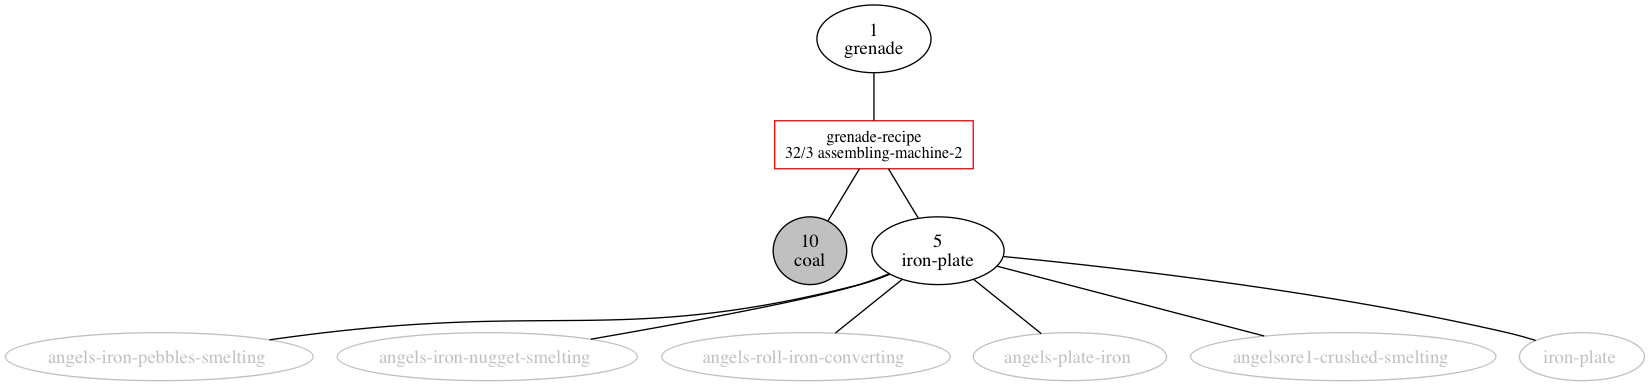

In [26]:
grenade = abc.production_tree('grenade',show_options=True)
show_tree(grenade)

In [27]:
def treeviz(item='grenade',quantity=1,show_options=False,preferred='',commodities=''):
    if item in abc.all_items:
        tree = abc.production_tree(item,quantity,show_options=show_options,
                                   preferred_recipes=preferred,commodities=commodities)
        tree_img = show_tree(tree)
        display(Image(filename='./temp.png'));
        #return Image(filename='./temp.png');
    else:
        possibilities = abc.search_recipes(item)
        print(possibilities)

In [28]:
interact(treeviz, quantity=IntText(value=1,description='per second',width=0.21),
        show_options=Checkbox(description='show options',icon='check',button_style='warning'));

interactive(children=(Text(value='grenade', description='item'), IntText(value=1, description='per second'), C…

In [32]:
abc.find_producers('raw-wood')

['desert-tree-arboretum-1',
 'swamp-tree-arboretum-1',
 'temperate-tree-arboretum-1',
 'tree-arboretum-1',
 'desert-tree-arboretum-2',
 'swamp-tree-arboretum-2',
 'temperate-tree-arboretum-2',
 'tree-arboretum-2',
 'tree-arboretum-3',
 'bob-basic-greenhouse-cycle',
 'bob-advanced-greenhouse-cycle']

In [ ]:
interact(treeviz, quantity=IntText(value=1,description='per second',width=0.21),
        show_options=Checkbox(description='show options',icon='check',button_style='warning'));

In [ ]:
widget_layout = Layout(display='flex',
                       flex_flow='row',
                       justify_content='space-between')

item_widget = Text(description='item',value='grenade')
ps_widget = IntText(value=1,description='per second')
show_widget = Checkbox(value=False,description='Show recipe options')
pref_widget = Text(description='Preferred recipes')
comm_widget = Text(description='Commodities')
form_items = [item_widget,ps_widget,valid, show_widget,pref_widget,comm_widget]
valid = Valid(value=False)
ingredients_w = widgets.Output(description='ingredients')
machines_w = Text(description='machines needed')

options = Box(form_items, layout=Layout(display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'))
requirements = widgets.VBox([ingredients_w, machines_w])

def update_valid(*args):
    comm_widget.value = str(args[0]['new'] in abc.all_items)
    
item_widget.observe(update_valid, 'value')

def update_output(*args):
    ingredients_w.value = all_ingredients(tree)

#item_widget.observe(update_output, 'value')
    
treeviz_gui = widgets.Tab(children=[options, requirements])
treeviz_gui.set_title(0,'Options')
treeviz_gui.set_title(1,'Requirements')

#tvwidget = interact(treeviz,item=item_widget,quantity=ps_widget,
#         show_options=show_widget, preferred=pref_widget,
#         commodities=comm_widget);
#tvwidget.widget.close()
#display(treeviz_gui)
#display(tvwidget.widget.out)

In [ ]:
tvwidget = widgets.interactive_output(treeviz,{'item':item_widget,'quantity':ps_widget,
         'show_options':show_widget, 'preferred':pref_widget,
         'commodities':comm_widget});
display(treeviz_gui,tvwidget)

In [ ]:
abc.find_producers('iron-ore')

In [ ]:
abc.recipes['quartz-glass']

In [ ]:
from ipywidgets import IntSlider
from IPython.display import display
x = IntSlider(description='x')
y = IntSlider(description='y')

def update_y(args):
    y.value = args['new']
    print(args['new'])

x.observe(update_y, 'value')

display(x)
display(y)